In [72]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [20]:
DATASET_INTERIM_PATH = r"data\interim"
V1_SPLIT = r"data\processed\v1"

In [102]:
df = pd.read_csv(os.path.join("..", DATASET_INTERIM_PATH, 'cleaned_data.csv'))
df_train = pd.read_csv(os.path.join("..", V1_SPLIT, 'train', 'targets', 'y_train.csv'))
df_valid = pd.read_csv(os.path.join("..", V1_SPLIT, 'valid', 'targets', 'y_valid.csv'))
df_test = pd.read_csv(os.path.join("..", V1_SPLIT, 'test', 'targets', 'y_test.csv'))

In [105]:
def group_and_plot_prices(ax, data, split):
    num_bins = 4
    max_price = data.max()
    min_price = data.min()
    bins = np.linspace(min_price, max_price, num_bins)

    counts = dict(pd.cut(df['Price'], bins, labels=['bin1 (low)', 'bin2 (med)', 'bin3 (high)']).value_counts())

    ax.bar(counts.keys(), counts.values())
    ax.set_title(f"{split}")

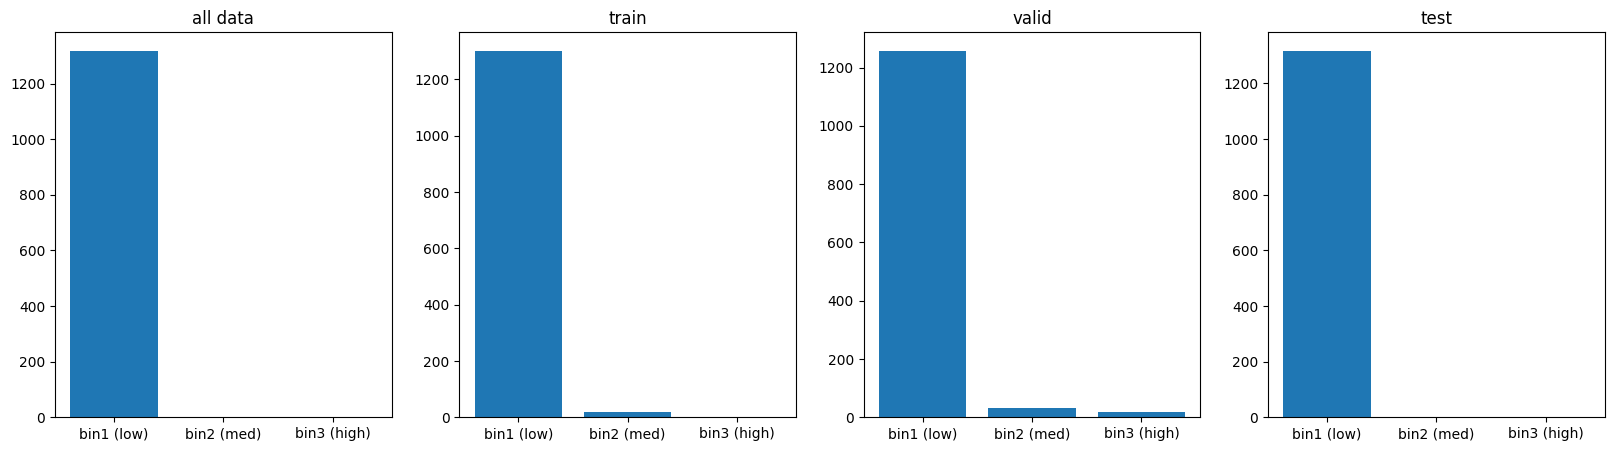

In [111]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

group_and_plot_prices(axes[0], df['Price'], 'all data')
group_and_plot_prices(axes[1], df_train['Price'], 'train')
group_and_plot_prices(axes[2], df_valid['Price'], 'valid')
group_and_plot_prices(axes[3], df_test['Price'], 'test')

plt.show()

* After grouping records with equally spaced bins based on housing prices for the whole dataset and data splits, their occurences were recorded and plotted in a bar chart.

* As can be seen, data points are heavily on the lower spectrum of the price. This is mostly caused by data points with very high prices (i.e., up to billions). Removal of such extreme points might improve the distribution of the data points according to housing prices which will essentially improve model performance. Thus, **adding more varying data points especially with higher prices might likely be the solution**.

* This phenomenon is reflected on the scatterplot of target and predictions of each models from `training_and_eval.ipynb`. Since there are more data points on the lower end spectrum of housing prices, there are less errors or residuals on test inputs of the same pricing spectrum.

* In short, the models' predicting capability is limited due to the data itself. It predicts houses with lower prices accurately compared to expensive ones.